In [16]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data_salary = pd.read_csv('/Users/pilatuspc12/Documents/GitHub/DS_mini_projects/DS_salary/ds_salaries.csv')


In [5]:
data_salary.head(30)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [11]:
#descriptive statistics
data_salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [12]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
#finding unique values in salary column
unique_currencies = data_salary['salary_currency'].unique()
unique_currencies

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [13]:
# Group by experience level and calculate mean salary
experience_salary = data_salary.groupby('experience_level')['salary_in_usd'].mean().sort_values()


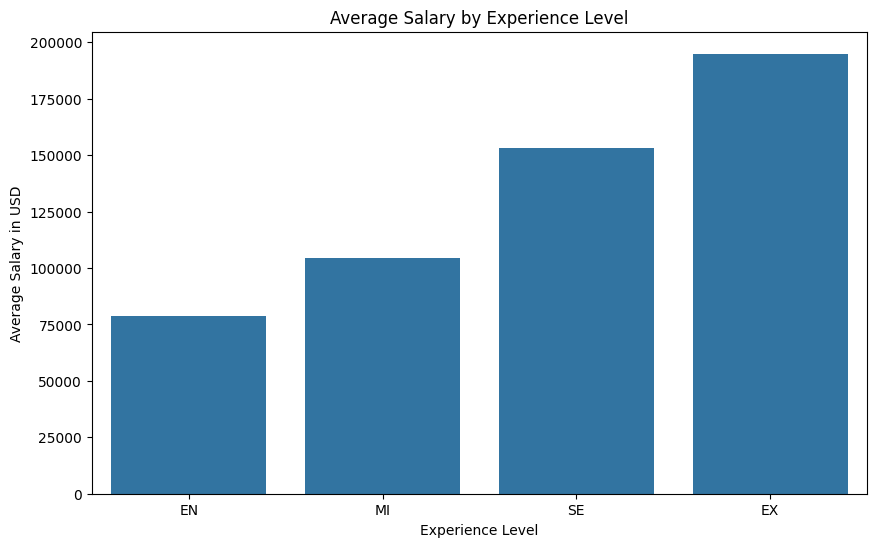

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=experience_salary.index, y=experience_salary.values)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.show()

In [28]:
# Exclude non-relevant and non-numeric columns
columns_to_exclude = ['salary_currency', 'employee_residence', 'company_location', 'job_title']
data_filtered = data_salary.drop(columns=columns_to_exclude)


In [29]:
# Convert remaining categorical columns to dummy variables
data_encoded = pd.get_dummies(data_filtered, columns=['experience_level', 'company_size', 'employment_type'])

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()
salary_corr = corr_matrix['salary_in_usd'].sort_values(ascending=False)

# Print the correlations
print(salary_corr)

salary_in_usd          1.000000
experience_level_SE    0.349900
work_year              0.228290
company_size_M         0.201830
experience_level_EX    0.160986
employment_type_FT     0.118263
employment_type_CT    -0.019772
salary                -0.023676
remote_ratio          -0.064171
employment_type_FL    -0.070292
employment_type_PT    -0.104864
company_size_L        -0.113346
company_size_S        -0.190663
experience_level_MI   -0.273791
experience_level_EN   -0.285743
Name: salary_in_usd, dtype: float64


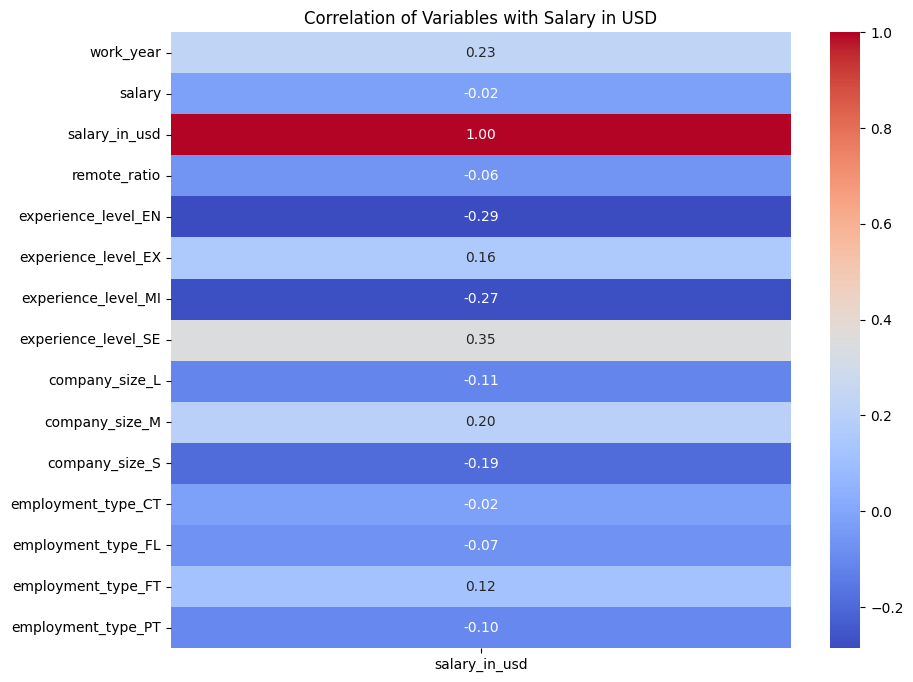

In [30]:

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['salary_in_usd']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Variables with Salary in USD')
plt.show()


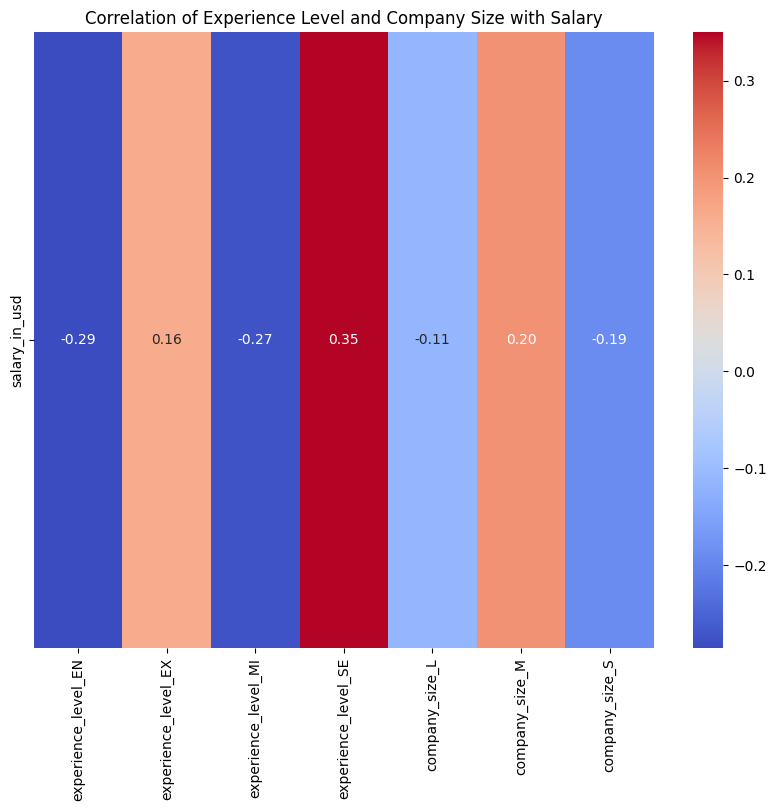

In [33]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[['salary_in_usd'], [col for col in corr_matrix.columns if 'experience_level' in col or 'company_size' in col]],
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Experience Level and Company Size with Salary')
plt.show()

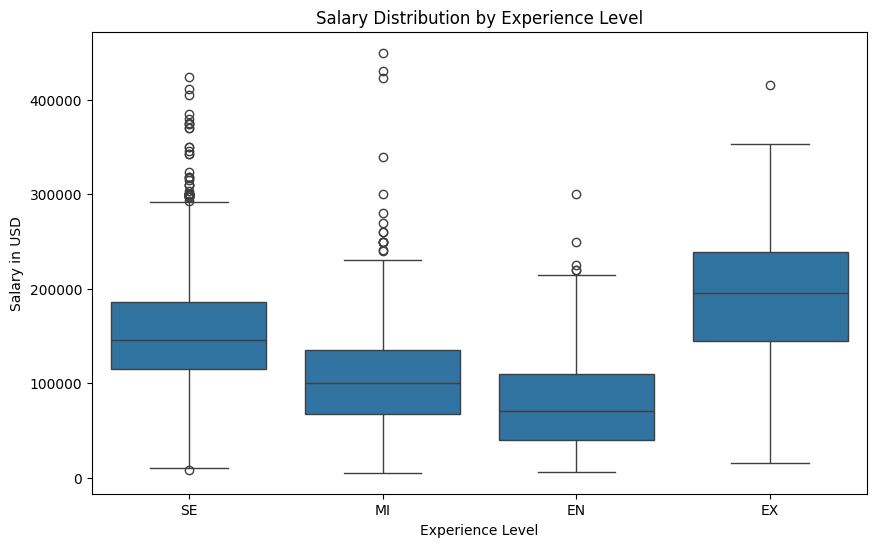

In [36]:
# Plotting salary distribution by experience level

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data_salary)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

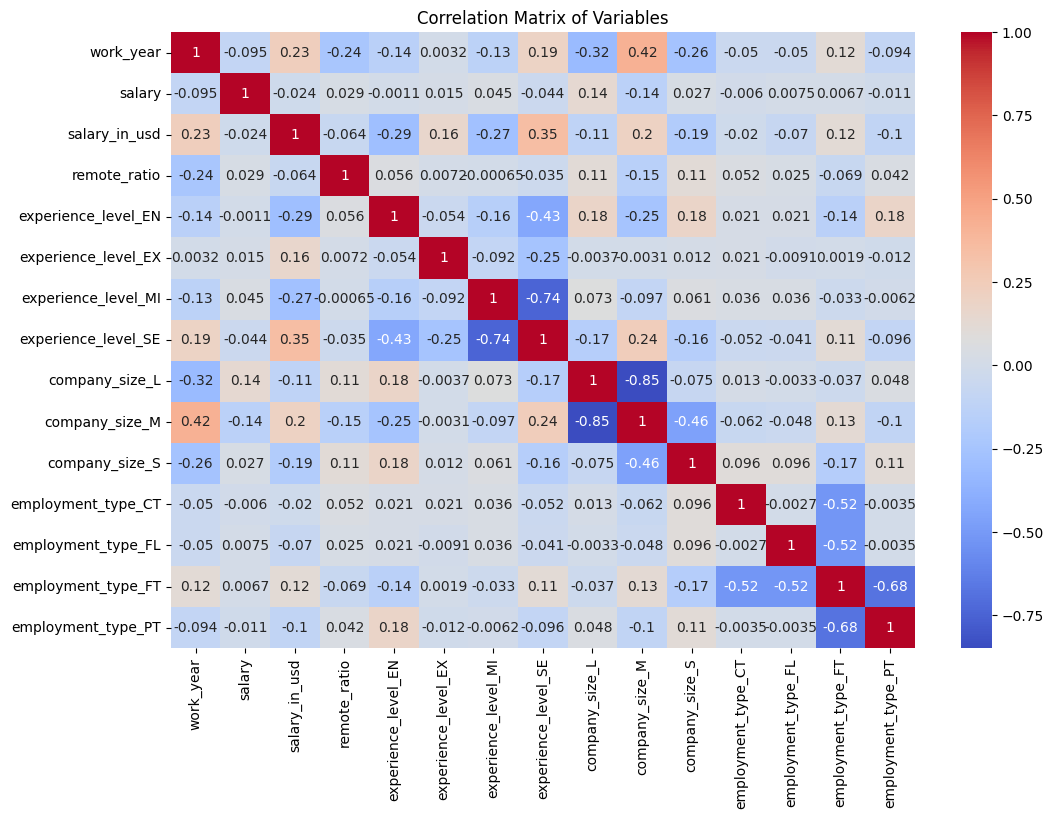

In [38]:
plt.figure(figsize=(12, 8))
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

### Key findings from heat map above 
1. Experience Level and Salary: Senior-level experience (denoted as experience_level_SE) has a positive correlation of 0.35 with salary_in_usd, the strongest among experience levels. This implies that, on average, senior professionals earn more. Conversely, entry-level (experience_level_EN) and mid-level (experience_level_MI) have negative correlations of -0.29 and -0.27, respectively, with salary, suggesting these roles typically command lower compensation.
2. Company Size: Medium-sized companies (company_size_M) have a positive correlation of 0.20 with salary_in_usd, indicating a tendency for medium-sized companies to pay more than smaller (company_size_S) or larger (company_size_L) companies, though the correlation is not very strong.
3. Employment Type: Full-time employment (employment_type_FT) shows a mild positive correlation (0.12) with salary, which could indicate that full-time roles tend to offer better salaries compared to part-time (employment_type_PT) roles, which have a negative correlation (-0.10) with salary.

# Storytelling

### Introduction
The dataset under analysis encompasses a range of data science salaries across various factors such as experience level, company size, and employment type. 
Our objective is to uncover insights that can guide data science professionals in their career decisions and salary negotiations.

### Methodology
The analysis was conducted through descriptive statistics, visualizations, and correlation matrices. 
We have encoded categorical data into numerical values to assess the relationships between different variables and salary in USD.

### Key Insights
Experience Level: There's a noticeable trend that more experienced professionals (denoted as 'SE' for senior level) tend to have higher salaries. The correlation coefficient of 0.35 supports this finding.
Company Size: Working for medium-sized companies shows a slight positive correlation (0.20) with salary, suggesting that these companies might offer competitive pay.
Entry-Level Positions: Entry-level positions (denoted as 'EN') have a negative correlation (-0.29) with salary, indicating lower pay scales for individuals at the beginning of their careers.

### Visualizations
The box plot of 'Salary Distribution by Experience Level' effectively illustrates the spread and outliers of salaries within each experience category. The heatmap of the 'Correlation Matrix of Variables' 
and the bar chart of 'Correlation of Experience Level and Company Size with Salary' visually support the correlation findings.

### Recommendations
Career Focus: Data science professionals should consider gaining experience and aiming for senior roles, which tend to be more lucrative.
Company Targeting: Medium-sized companies might offer a sweet spot in terms of compensation, potentially providing both competitive salaries and opportunities for growth.

### Conclusion
The analysis underscores the importance of experience and the potential benefits of working for medium-sized companies in the data science field. As the industry evolves, it's crucial 
for professionals to continuously develop their skills and knowledge to navigate their career paths effectively and maximize their earning potential.